### Read and describe datasets

We obtain data from Kaggle's competion website. The data needs to be prepared because attributes "Name" and "Ticket" have no standard and "Cabin" has missed values. Also, category attributes like "Sex" and "Embarked" can be converted to integer numbers for reduce the file size.

Look at https://www.kaggle.com/c/titanic/data and read the dataset documentation.

In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

In [19]:
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Dataset Analysis
Note that:
1. PassengerId is unique;
2. Sex has 2 categories [male, female] and the most (65,7%) are male;
3. Tickets are not unique and ticket 347082 appears 7 times;
4. 72% of cabins are shared, there are a lot of null values and the most shared cabin was C23 C25 C27 (4 people);
5. Embarked (port of embarkation) has 3 categories { C = Cherbourg, Q = Queenstown, S = Southampton } and Port S is the most popular with 72,4% of passengers;
6. The youngst passenger was a 5 months old baby and the older was 80 years old;
7. 75% of passengers were aged 39 years or less;
8. Test dataset has only children;
9. 38,4% of survivors in train dataset;
10. Pclass has 3 categories [1,2,3];
11. There are free tickets until $ 512.33;
12. There are titles and " for nicknames in Name.

In [6]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collander, Mr. Erik Gustaf",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
df_test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rheims, Mr. George Alexander Lucien",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Before we continue, let's load dataset after features treatment

In [32]:
df_train = pd.read_csv('../data/interim/train.csv')
df_test = pd.read_csv('../data/interim/test.csv')

### Correlations with Survived

Some attributes are more relevant thant other to predict survivors. For instance, PassengerId is irrelevant to this task, but Pclass may be a good predictor. Combining good predictor can make some algorithms improve their precision.

Some algorithms find their weights for features but others need you to select the most relevant features to them.

#### Some good predictor?
> We can observe:
1. Sex is a regular good predictor (probably they saved ladies)
2. Pclass and Fare weak predictor (they are correlated. Pclass is categorized by fare, right?)

In [33]:
df_train.corr()['Survived']

Unnamed: 0    -0.005007
PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.073296
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.167675
Name: Survived, dtype: float64

## women first

One can see that women survived a lot more than men. Probably, they worked with the first-women rule.

In [65]:
male_survived = df_train[(df_train['Sex'] == 0) & (df_train['Survived'] == 1) ].count()[0]
female_survived = df_train[(df_train['Sex'] == 1) & (df_train['Survived'] == 1) ].count()[0]

male_percent = male_survived / df_train[df_train['Sex'] == 0].count()[0] * 100
female_percent = female_survived / df_train[df_train['Sex'] == 1].count()[0] * 100

print(f'Male survivor: {male_survived} ({male_percent:.02f}%)')
print(f'Female survivor: {female_survived} ({female_percent:.02f}%)')

Male survivor: 109 (18.89%)
Female survivor: 233 (74.20%)


#### Kids and youngs

Here we find more females survivors again but males kids survived more than adults percentually.

In [67]:
male_kids_survived = df_train[(df_train['Sex'] == 0) & (df_train['Age'] < 18) & (df_train['Survived'] == 1)].count()[0]
female_kids_survived = df_train[(df_train['Sex'] == 1) & (df_train['Age'] < 18) & (df_train['Survived'] == 1)].count()[0]

male_kids_percent = male_survived / df_train[(df_train['Sex'] == 0) & (df_train['Age'] < 18)].count()[0] * 100
female_kids_percent = female_survived / df_train[(df_train['Sex'] == 1) & (df_train['Age'] < 18)].count()[0] * 100

print(f'Male kids survivor: {male_kids_survived} ({male_kids_percent:.02f}%)')
print(f'Female kids survivor: {female_kids_survived} ({female_kids_percent:.02f}%)')

Male kids survivor: 23 (39.66%)
Female kids survivor: 38 (69.09%)


### Riches first

In [68]:
first_class_survived = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].count()[0]
second_class_survived = df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].count()[0]
third_class_survived = df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].count()[0]

first_class_percent = first_class_survived / df_train[(df_train['Pclass'] == 1)].count()[0] * 100
second_class_percent = second_class_survived / df_train[(df_train['Pclass'] == 2)].count()[0] * 100
third_class_percent = third_class_survived / df_train[(df_train['Pclass'] == 3)].count()[0] * 100

print(f'First class survivor: {first_class_survived} ({first_class_percent:.02f}%)')
print(f'Second class survivor: {second_class_survived} ({second_class_percent:.02f}%)')
print(f'Third class survivor: {third_class_survived} ({third_class_percent:.02f}%)')

First class survivor: 136 (62.96%)
Second class survivor: 87 (47.28%)
Third class survivor: 119 (24.24%)


# Visualize dataset

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [50]:
sns.set(color_codes=True)

/Users/fialves1/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


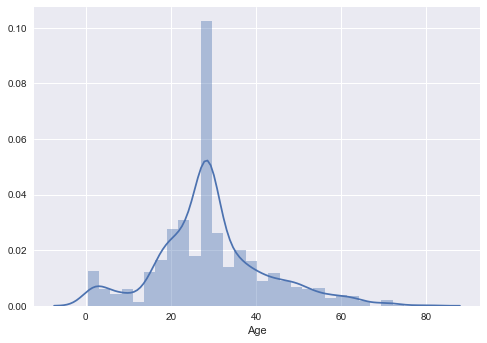

In [51]:
sns.distplot(df_train['Age'])
plt.show()